In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
a=pd.read_csv("Credit.csv")

In [3]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
a.shape

(981, 13)

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [7]:
a.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
a.isnull().sum()[a.isnull().sum()*100/a.shape[0]>40]

Series([], dtype: int64)

In [10]:
a=a.drop("Loan_ID",axis=1)

In [12]:
a.Gender=a.Gender.fillna("Male")
a.Married=a.Married.fillna("No")
a.Dependents=a.Dependents.fillna(0)
a.Self_Employed=a.Self_Employed.fillna("Yes")
a.LoanAmount=a.LoanAmount.fillna(a.LoanAmount.mean())
a.Loan_Amount_Term=a.Loan_Amount_Term.fillna(a.Loan_Amount_Term.mean())
a.Credit_History=a.Credit_History.fillna(0)
a.Loan_Status=a.Loan_Status.replace({"Y":1,"N":0})

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a[a.select_dtypes(include=["object"]).columns]=a[a.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(a,test_size=0.2)

In [20]:
a_train_x=x_train.iloc[:,:-1]
a_train_y=x_train.iloc[:,-1]


In [21]:
a_test_x=x_test.iloc[:,:-1]
a_test_y=x_test.iloc[:,-1]


In [22]:
from sklearn.linear_model import LogisticRegression
R=LogisticRegression()
R.fit(a_train_x,a_train_y)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
pred=R.predict(a_test_x)

In [25]:
pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(a_test_y,pred)

In [27]:
c

array([[ 26,  23],
       [ 14, 134]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(a_test_y,pred)

0.8121827411167513

In [30]:
from sklearn.metrics import recall_score
recall_score(a_test_y,pred)


0.9054054054054054

In [31]:
from sklearn.metrics import precision_score
precision_score(a_test_y,pred)

0.8535031847133758

In [33]:
from sklearn.metrics import f1_score
f1_score(a_test_y,pred)

0.8786885245901639

In [34]:
pred_prob=R.predict_proba(a_test_x)

In [36]:
pred_prob

array([[0.61612121, 0.38387879],
       [0.15160486, 0.84839514],
       [0.31618433, 0.68381567],
       [0.09174516, 0.90825484],
       [0.23740173, 0.76259827],
       [0.81688322, 0.18311678],
       [0.18137123, 0.81862877],
       [0.23524634, 0.76475366],
       [0.23262822, 0.76737178],
       [0.65574192, 0.34425808],
       [0.09009929, 0.90990071],
       [0.11774028, 0.88225972],
       [0.27324824, 0.72675176],
       [0.21413505, 0.78586495],
       [0.18781907, 0.81218093],
       [0.1511624 , 0.8488376 ],
       [0.43708804, 0.56291196],
       [0.63624786, 0.36375214],
       [0.75299848, 0.24700152],
       [0.64690227, 0.35309773],
       [0.2374995 , 0.7625005 ],
       [0.2260654 , 0.7739346 ],
       [0.07061697, 0.92938303],
       [0.041283  , 0.958717  ],
       [0.31495111, 0.68504889],
       [0.23168418, 0.76831582],
       [0.24090172, 0.75909828],
       [0.30299642, 0.69700358],
       [0.69423162, 0.30576838],
       [0.15394355, 0.84605645],
       [0.

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [41]:
roc_auc_score(a_test_y,pred)*100

71.80088251516821

In [42]:
pred_prob[:,1]

array([0.38387879, 0.84839514, 0.68381567, 0.90825484, 0.76259827,
       0.18311678, 0.81862877, 0.76475366, 0.76737178, 0.34425808,
       0.90990071, 0.88225972, 0.72675176, 0.78586495, 0.81218093,
       0.8488376 , 0.56291196, 0.36375214, 0.24700152, 0.35309773,
       0.7625005 , 0.7739346 , 0.92938303, 0.958717  , 0.68504889,
       0.76831582, 0.75909828, 0.69700358, 0.30576838, 0.84605645,
       0.85813866, 0.75723873, 0.79417746, 0.82326603, 0.52805072,
       0.70003612, 0.57226724, 0.90392742, 0.64765813, 0.73429985,
       0.92445872, 0.91757217, 0.22623325, 0.22475841, 0.96480544,
       0.32661482, 0.84090448, 0.87601959, 0.35493306, 0.24424066,
       0.73595907, 0.70210895, 0.8343558 , 0.84009745, 0.2653133 ,
       0.89667295, 0.78159736, 0.26890807, 0.20152215, 0.67971491,
       0.81488686, 0.66770234, 0.39774257, 0.88976492, 0.73845278,
       0.78386859, 0.94956755, 0.79398109, 0.94595512, 0.85490867,
       0.32469353, 0.26032762, 0.86037318, 0.69222287, 0.61832

In [45]:
fpr,tpr,ther=roc_curve(a_test_y,pred_prob[:,1])

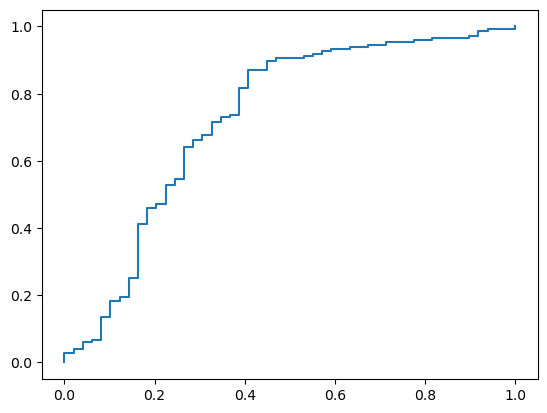

In [46]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)